## Penguin Dataset Using KNN
Implement the explored KNN classification mechanism, along with the data visualization techniques discussed on the datasets.


In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore') 

In [21]:
df = sns.load_dataset('penguins')

In [22]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [25]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [26]:
# handle missing values using simple imputer
imputer = SimpleImputer(strategy='mean')

# using mean statregy for numeric values 
df['bill_length_mm'] = imputer.fit_transform(df[['bill_length_mm']])
df['bill_depth_mm'] = imputer.fit_transform(df[['bill_depth_mm']])
df['flipper_length_mm'] = imputer.fit_transform(df[['flipper_length_mm']])
df['body_mass_g'] = imputer.fit_transform(df[['body_mass_g']])


In [27]:
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [28]:
df.sex.value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [29]:
# handle categorical missing values using knn imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df['sex'] = cat_imputer.fit_transform(df[['sex']]).ravel()

In [30]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

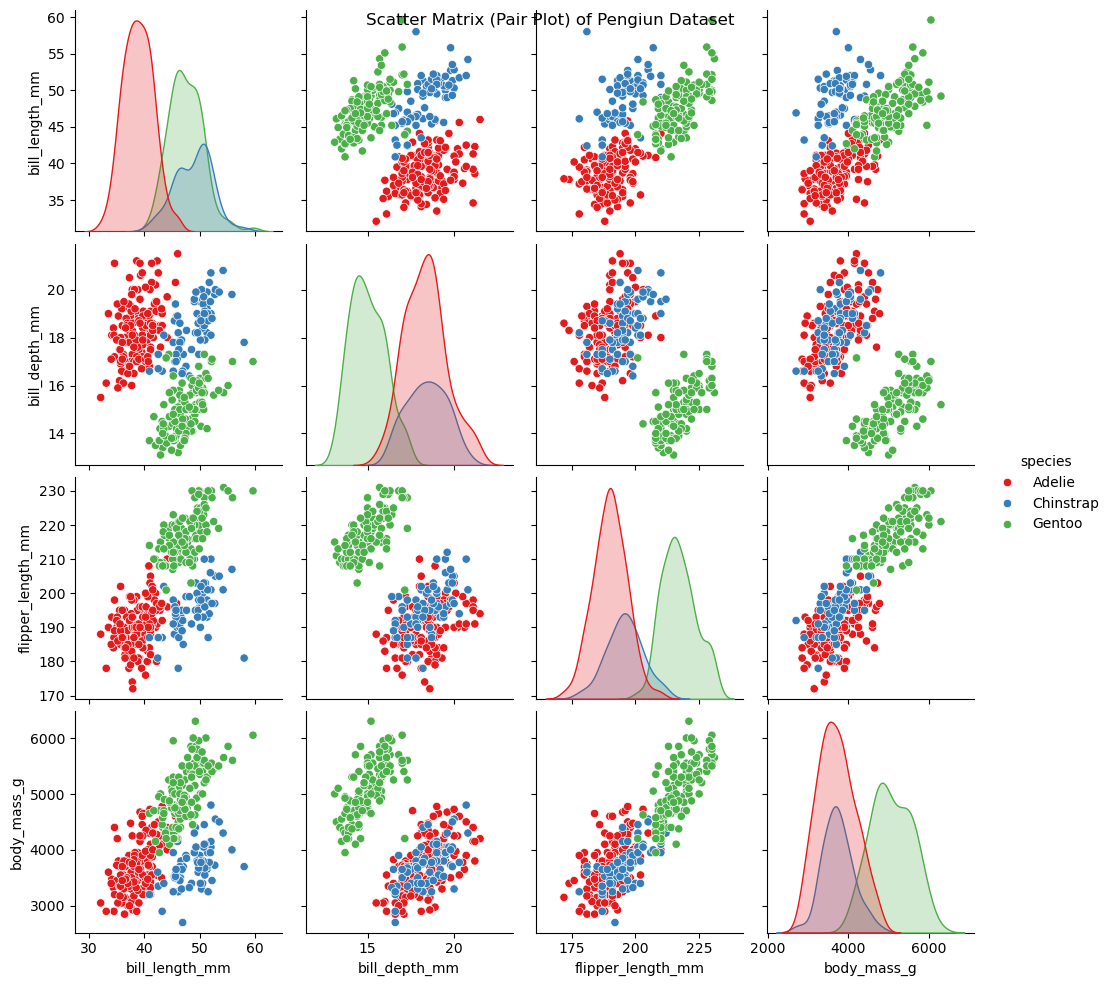

In [31]:
sns.pairplot(
    df,
    vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    hue='species',
    palette='Set1'
)
plt.suptitle('Scatter Matrix (Pair Plot) of Pengiun Dataset')
plt.show()

In [32]:
# Step 3: Encode categorical features
le_species = LabelEncoder()
df['species'] = le_species.fit_transform(df['species'])

le_island = LabelEncoder()
df['island'] = le_island.fit_transform(df['island'])

le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

In [33]:
# Step 4: Features (X) and Target (y)
X = df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

In [34]:
# split data and use standard scalar to normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [35]:
# Step 7: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
#  Predictions
y_pred = knn.predict(X_test)

In [37]:
#  Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [38]:
sample = np.array([[0, 39.1, 18.7, 181, 3750, 1]])

sample_scaled = scaler.transform(sample)

# Prediction
pred = knn.predict(sample_scaled)
species_name = le_species.inverse_transform(pred)

print("Predicted Species:", species_name[0])

Predicted Species: Adelie
